## Comparison of TRENDY v10 and v11 at the DBEN sites

In [1]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs


In [2]:
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

In [3]:
def mon_mean(x):
        return x.groupby('time.month').mean('time')

### Load Solar v 11

In [4]:
solar_v11_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/BCI/clmforc.TRENDY.bci.c2022_0.5x0.5.Solr.full.nc'
solar_v11_bci = xr.open_dataset(solar_v11_bci)

In [5]:
fsds_v11_bci_diffuse = np.squeeze(solar_v11_bci.FSDS_DIFFUSE)
fsds_v11_bci_diffuse = fsds_v11_bci_diffuse.groupby('time.year').apply(mon_mean)
fsds_v11_bci_diffuse = fsds_v11_bci_diffuse.stack(time=('year','month'))
fsds_v11_bci_direct = np.squeeze(solar_v11_bci.FSDS_DIRECT)
fsds_v11_bci_direct = fsds_v11_bci_direct.groupby('time.year').apply(mon_mean)
fsds_v11_bci_direct = fsds_v11_bci_direct.stack(time=('year','month'))

In [6]:
solar_v11_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/BIA/clmforc.TRENDY.bia.c2022_0.5x0.5.Solr.full.nc'
solar_v11_bia = xr.open_dataset(solar_v11_bia)

In [7]:
fsds_v11_bia_diffuse = np.squeeze(solar_v11_bia.FSDS_DIFFUSE)
fsds_v11_bia_diffuse = fsds_v11_bia_diffuse.groupby('time.year').apply(mon_mean)
fsds_v11_bia_diffuse = fsds_v11_bia_diffuse.stack(time=('year','month'))
fsds_v11_bia_direct = np.squeeze(solar_v11_bia.FSDS_DIRECT)
fsds_v11_bia_direct = fsds_v11_bia_direct.groupby('time.year').apply(mon_mean)
fsds_v11_bia_direct = fsds_v11_bia_direct.stack(time=('year','month'))

In [8]:
solar_v11_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/FI/clmforc.TRENDY.fi.c2022_0.5x0.5.Solr.full.nc'
solar_v11_fi = xr.open_dataset(solar_v11_fi)

In [9]:
fsds_v11_fi_diffuse = np.squeeze(solar_v11_fi.FSDS_DIFFUSE)
fsds_v11_fi_diffuse = fsds_v11_fi_diffuse.groupby('time.year').apply(mon_mean)
fsds_v11_fi_diffuse = fsds_v11_fi_diffuse.stack(time=('year','month'))
fsds_v11_fi_direct = np.squeeze(solar_v11_fi.FSDS_DIRECT)
fsds_v11_fi_direct = fsds_v11_fi_direct.groupby('time.year').apply(mon_mean)
fsds_v11_fi_direct = fsds_v11_fi_direct.stack(time=('year','month'))

### Load Solar v10 

''

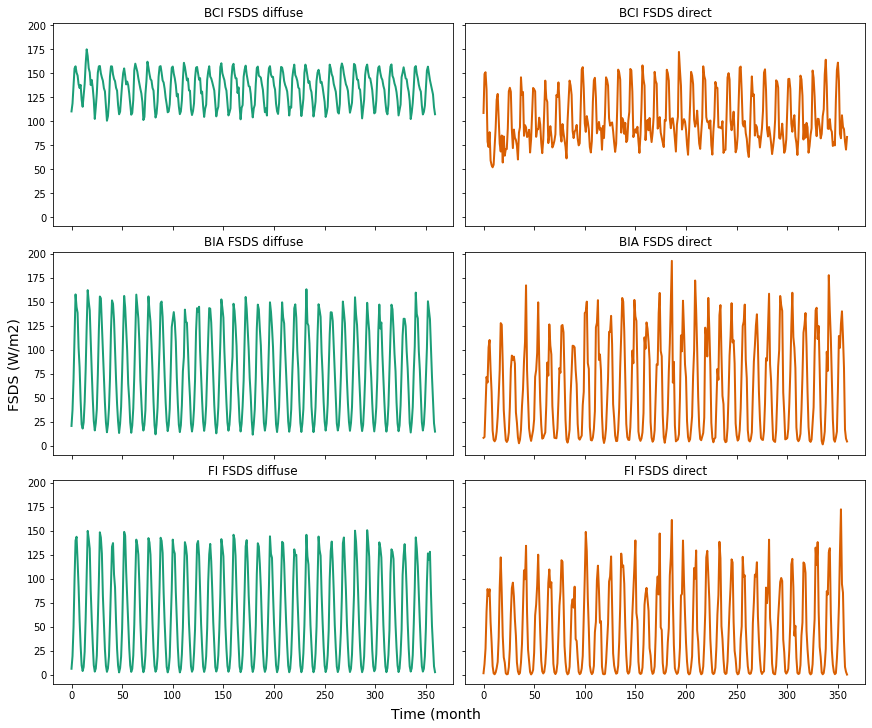

In [10]:
fig2, ((f2ax0,f2ax1),(f2ax2,f2ax3),(f2ax4,f2ax5)) = plt.subplots(nrows=3,ncols=2, 
                                                                 figsize=(12,10),sharex=True,sharey=True,
                                                                constrained_layout=True)
 
f2ax0.plot(fsds_v11_bci_diffuse, color=colormap[0], linewidth=2, label = 'BCI v1')
f2ax0.set_title('BCI FSDS diffuse', fontsize = 12)
f2ax1.plot(fsds_v11_bci_direct, color=colormap[1], linewidth=2, label = 'BCI v11')
f2ax1.set_title('BCI FSDS direct', fontsize = 12)

f2ax2.plot(fsds_v11_bia_diffuse, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax2.set_title('BIA FSDS diffuse', fontsize = 12)
f2ax3.plot(fsds_v11_bia_direct, color=colormap[1], linewidth=2, label = 'BIA v11')
f2ax3.set_title('BIA FSDS direct', fontsize = 12)

f2ax4.plot(fsds_v11_fi_diffuse, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax4.set_title('FI FSDS diffuse', fontsize = 12)
f2ax5.plot(fsds_v11_fi_direct, color=colormap[1], linewidth=2, label = 'FI v11')
f2ax5.set_title('FI FSDS direct', fontsize = 12)

fig2.supylabel('FSDS (W/m2)', fontsize = 14)
fig2.supxlabel('Time (month', fontsize = 14)
;

### Load Prec v11

In [11]:
prec_v11_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/BCI/clmforc.TRENDY.bci.c2022_0.5x0.5.Prec.full.nc'
prec_v11_bci = xr.open_dataset(prec_v11_bci)

In [12]:
prec_v11_bci = np.squeeze(prec_v11_bci.PRECTmms)
prec_v11_bci = prec_v11_bci.groupby('time.year').apply(mon_mean)
prec_v11_bci = prec_v11_bci.stack(time=('year','month'))


In [13]:
prec_v11_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/BIA/clmforc.TRENDY.bia.c2022_0.5x0.5.Prec.full.nc'
prec_v11_bia = xr.open_dataset(prec_v11_bia)

In [14]:
prec_v11_bia = np.squeeze(prec_v11_bia.PRECTmms)
prec_v11_bia = prec_v11_bia.groupby('time.year').apply(mon_mean)
prec_v11_bia = prec_v11_bia.stack(time=('year','month'))


In [15]:
prec_v11_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/FI/clmforc.TRENDY.fi.c2022_0.5x0.5.Prec.full.nc'
prec_v11_fi = xr.open_dataset(prec_v11_fi)

In [16]:
prec_v11_fi = np.squeeze(prec_v11_fi.PRECTmms)
prec_v11_fi = prec_v11_fi.groupby('time.year').apply(mon_mean)
prec_v11_fi = prec_v11_fi.stack(time=('year','month'))


''

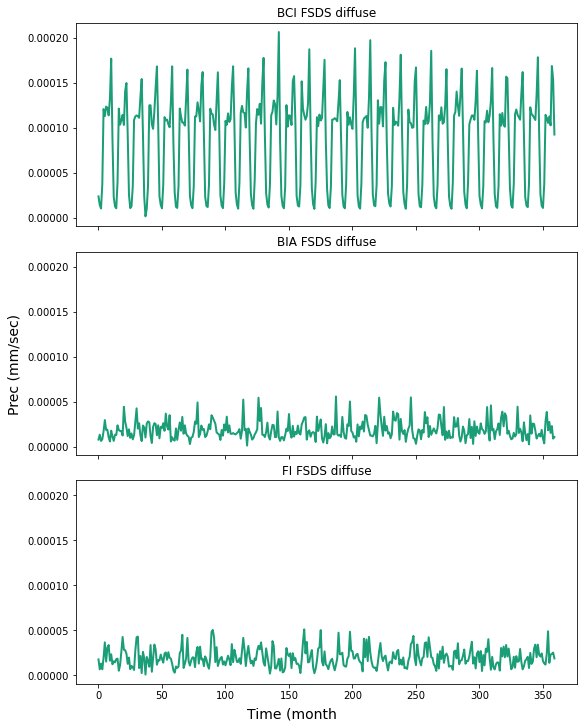

In [17]:
fig2, ((f2ax0),(f2ax1),(f2ax2)) = plt.subplots(nrows=3,ncols=1, 
                                                                 figsize=(8,10),sharex=True,sharey=True,
                                                                constrained_layout=True)
 
f2ax0.plot(prec_v11_bci, color=colormap[0], linewidth=2, label = 'BCI v11')
f2ax0.set_title('BCI FSDS diffuse', fontsize = 12)

f2ax1.plot(prec_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax1.set_title('BIA FSDS diffuse', fontsize = 12)

f2ax2.plot(prec_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax2.set_title('FI FSDS diffuse', fontsize = 12)

fig2.supylabel('Prec (mm/sec)', fontsize = 14)
fig2.supxlabel('Time (month', fontsize = 14)
;

In [29]:
TPQWL_v11_bci = '/pscratch/sd/j/jneedham/trendy_dben_fig/BCI/clmforc.TRENDY.bci.c2022_0.5x0.5.TPQWL.full.nc'
TPQWL_v11_bci = xr.open_dataset(TPQWL_v11_bci)

In [30]:
FLDS_v11_bci = np.squeeze(TPQWL_v11_bci.FLDS)
FLDS_v11_bci = FLDS_v11_bci.groupby('time.year').apply(mon_mean)
FLDS_v11_bci = FLDS_v11_bci.stack(time=('year','month'))

PSRF_v11_bci = np.squeeze(TPQWL_v11_bci.PSRF)
PSRF_v11_bci = PSRF_v11_bci.groupby('time.year').apply(mon_mean)
PSRF_v11_bci = PSRF_v11_bci.stack(time=('year','month'))

QBOT_v11_bci = np.squeeze(TPQWL_v11_bci.QBOT)
QBOT_v11_bci = QBOT_v11_bci.groupby('time.year').apply(mon_mean)
QBOT_v11_bci = QBOT_v11_bci.stack(time=('year','month'))

TBOT_v11_bci = np.squeeze(TPQWL_v11_bci.TBOT)
TBOT_v11_bci = TBOT_v11_bci.groupby('time.year').apply(mon_mean)
TBOT_v11_bci = TBOT_v11_bci.stack(time=('year','month'))

WIND_v11_bci = np.squeeze(TPQWL_v11_bci.WIND)
WIND_v11_bci = WIND_v11_bci.groupby('time.year').apply(mon_mean)
WIND_v11_bci = WIND_v11_bci.stack(time=('year','month'))

In [31]:
TPQWL_v11_bia = '/pscratch/sd/j/jneedham/trendy_dben_fig/BIA/clmforc.TRENDY.bia.c2022_0.5x0.5.TPQWL.full.nc'
TPQWL_v11_bia = xr.open_dataset(TPQWL_v11_bia)

In [32]:
FLDS_v11_bia = np.squeeze(TPQWL_v11_bia.FLDS)
FLDS_v11_bia = FLDS_v11_bia.groupby('time.year').apply(mon_mean)
FLDS_v11_bia = FLDS_v11_bia.stack(time=('year','month'))

PSRF_v11_bia = np.squeeze(TPQWL_v11_bia.PSRF)
PSRF_v11_bia = PSRF_v11_bia.groupby('time.year').apply(mon_mean)
PSRF_v11_bia = PSRF_v11_bia.stack(time=('year','month'))

QBOT_v11_bia = np.squeeze(TPQWL_v11_bia.QBOT)
QBOT_v11_bia = QBOT_v11_bia.groupby('time.year').apply(mon_mean)
QBOT_v11_bia = QBOT_v11_bia.stack(time=('year','month'))

TBOT_v11_bia = np.squeeze(TPQWL_v11_bia.TBOT)
TBOT_v11_bia = TBOT_v11_bia.groupby('time.year').apply(mon_mean)
TBOT_v11_bia = TBOT_v11_bia.stack(time=('year','month'))

WIND_v11_bia = np.squeeze(TPQWL_v11_bia.WIND)
WIND_v11_bia = WIND_v11_bia.groupby('time.year').apply(mon_mean)
WIND_v11_bia = WIND_v11_bia.stack(time=('year','month'))


In [33]:
TPQWL_v11_fi = '/pscratch/sd/j/jneedham/trendy_dben_fig/FI/clmforc.TRENDY.fi.c2022_0.5x0.5.TPQWL.full.nc'
TPQWL_v11_fi = xr.open_dataset(TPQWL_v11_fi)

In [34]:
FLDS_v11_fi = np.squeeze(TPQWL_v11_fi.FLDS)
FLDS_v11_fi = FLDS_v11_fi.groupby('time.year').apply(mon_mean)
FLDS_v11_fi = FLDS_v11_fi.stack(time=('year','month'))

PSRF_v11_fi = np.squeeze(TPQWL_v11_fi.PSRF)
PSRF_v11_fi = PSRF_v11_fi.groupby('time.year').apply(mon_mean)
PSRF_v11_fi = PSRF_v11_fi.stack(time=('year','month'))

QBOT_v11_fi = np.squeeze(TPQWL_v11_fi.QBOT)
QBOT_v11_fi = QBOT_v11_fi.groupby('time.year').apply(mon_mean)
QBOT_v11_fi = QBOT_v11_fi.stack(time=('year','month'))

TBOT_v11_fi = np.squeeze(TPQWL_v11_fi.TBOT)
TBOT_v11_fi = TBOT_v11_fi.groupby('time.year').apply(mon_mean)
TBOT_v11_fi = TBOT_v11_fi.stack(time=('year','month'))

WIND_v11_fi = np.squeeze(TPQWL_v11_fi.WIND)
WIND_v11_fi = WIND_v11_fi.groupby('time.year').apply(mon_mean)
WIND_v11_fi = WIND_v11_fi.stack(time=('year','month'))


''

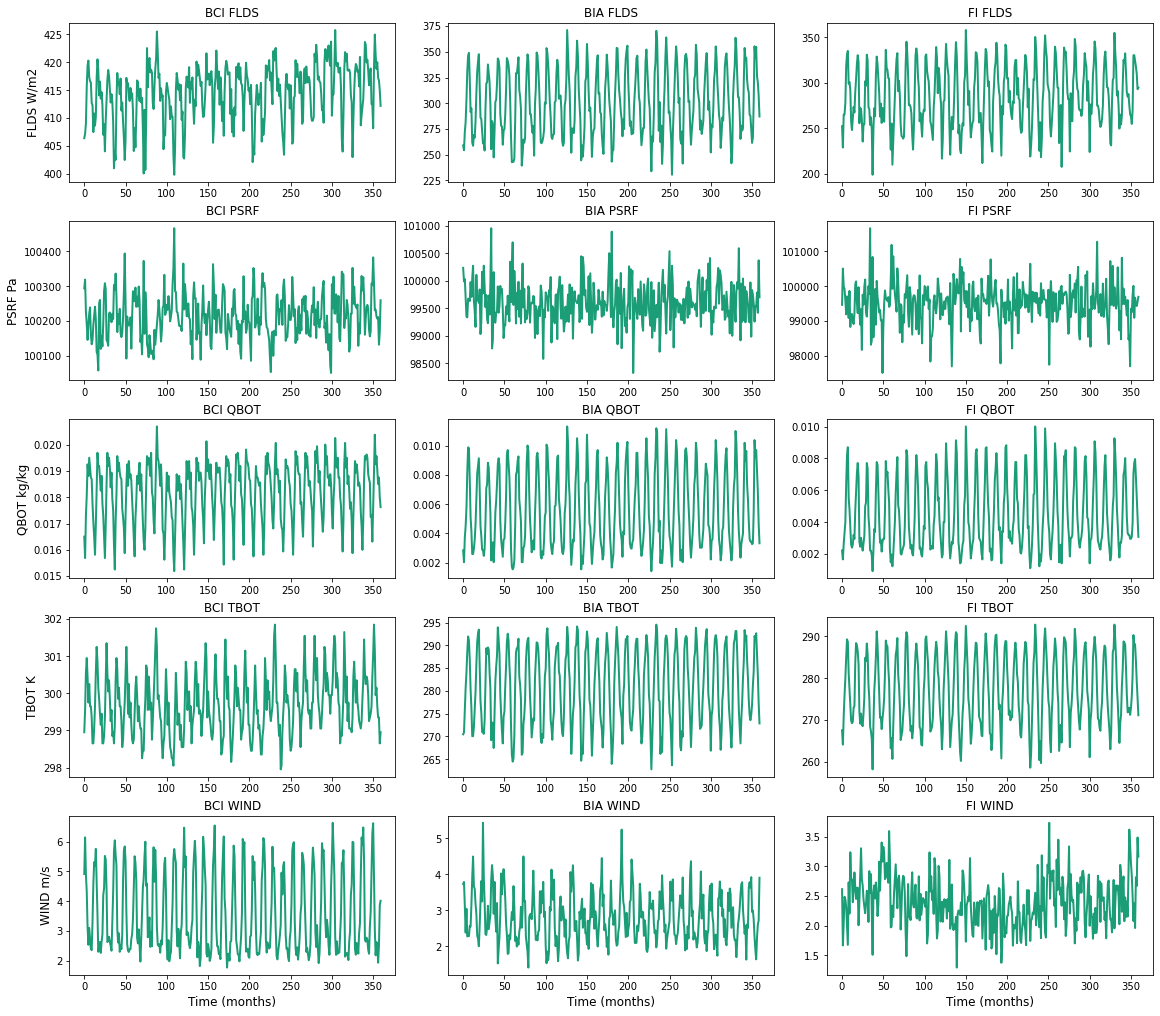

In [40]:
fig2, ((f2ax0,f2ax1,f2ax2),(f2ax3,f2ax4,f2ax5), (f2ax6,f2ax7,f2ax8),
      (f2ax9,f2ax10,f2ax11),(f2ax12,f2ax13,f2ax14)) = plt.subplots(nrows=5,ncols=3,
                                                                   figsize=(16,14),constrained_layout=True)
 
f2ax0.plot(FLDS_v11_bci, color=colormap[0], linewidth=2, label = 'BCI v11')
f2ax0.set_title('BCI FLDS', fontsize = 12)
f2ax0.set_ylabel('FLDS W/m2', fontsize = 12)
f2ax1.plot(FLDS_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax1.set_title('BIA FLDS', fontsize = 12)
f2ax2.plot(FLDS_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax2.set_title('FI FLDS', fontsize = 12)

f2ax3.plot(PSRF_v11_bci, color=colormap[0], linewidth=2, label = 'BCI v11')
f2ax3.set_title('BCI PSRF', fontsize = 12)
f2ax3.set_ylabel('PSRF Pa', fontsize = 12)
f2ax4.plot(PSRF_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax4.set_title('BIA PSRF', fontsize = 12)
f2ax5.plot(PSRF_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax5.set_title('FI PSRF', fontsize = 12)

f2ax6.plot(QBOT_v11_bci, color=colormap[0], linewidth=2, label = 'BCI v11')
f2ax6.set_title('BCI QBOT', fontsize = 12)
f2ax6.set_ylabel('QBOT kg/kg', fontsize = 12)
f2ax7.plot(QBOT_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax7.set_title('BIA QBOT', fontsize = 12)
f2ax8.plot(QBOT_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax8.set_title('FI QBOT', fontsize = 12)

f2ax9.plot(TBOT_v11_bci, color=colormap[0], linewidth=2, label = 'BCI v11')
f2ax9.set_title('BCI TBOT', fontsize = 12)
f2ax9.set_ylabel('TBOT K', fontsize = 12)
f2ax10.plot(TBOT_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax10.set_title('BIA TBOT', fontsize = 12)
f2ax11.plot(TBOT_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax11.set_title('FI TBOT', fontsize = 12)

f2ax12.plot(WIND_v11_bci, color=colormap[0], linewidth=2, label = 'BCI v11')
f2ax12.set_title('BCI WIND', fontsize = 12)
f2ax12.set_xlabel('Time (months)', fontsize = 12)
f2ax12.set_ylabel('WIND m/s', fontsize = 12)
f2ax13.plot(WIND_v11_bia, color=colormap[0], linewidth=2, label = 'BIA v11')
f2ax13.set_title('BIA WIND', fontsize = 12)
f2ax13.set_xlabel('Time (months)', fontsize = 12)
f2ax14.plot(WIND_v11_fi, color=colormap[0], linewidth=2, label = 'FI v11')
f2ax14.set_title('FI WIND', fontsize = 12)
f2ax14.set_xlabel('Time (months)', fontsize = 12)
;